# CHAPTER 13

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 13.1 Bitly Data from 1.USA.gov

In [3]:
path = "/content/drive/MyDrive/DataAnalysis/Tuần 7/example.txt"
with open(path) as f:
  print(f.readline())

{ "a": "Mozilla\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\/535.11 (KHTML, like Gecko) Chrome\/17.0.963.78 Safari\/535.11", "c": "US", "nk": 1, "tz": "America\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\/\/www.facebook.com\/l\/7AQEFzjSi\/1.usa.gov\/wfLQtf", "u": "http:\/\/www.ncbi.nlm.nih.gov\/pubmed\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }



In [4]:
import json
with open(path) as f:
  records = [json.loads(line) for line in f]

In [6]:
records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'c': 'US',
 'nk': 1,
 'tz': 'America/New_York',
 'gr': 'MA',
 'g': 'A6qOVH',
 'h': 'wfLQtf',
 'l': 'orofrog',
 'al': 'en-US,en;q=0.8',
 'hh': '1.usa.gov',
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
 't': 1331923247,
 'hc': 1331822918,
 'cy': 'Danvers',
 'll': [42.576698, -70.954903]}

###Counting Time Zones in Pure Python

In [10]:
time_zones = [rec["tz"] for rec in records if "tz" in rec]
time_zones[:10]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

In [12]:
def get_counts(sequence):
  counts = {}
  for x in sequence:
    if x in counts:
      counts[x] += 1
    else:
      counts[x] = 1
  return counts

In [13]:
from collections import defaultdict
def get_counts2(sequence):
  counts = defaultdict(int)
  for x in sequence:
    counts[x] += 1
  return counts

In [14]:
counts = get_counts(time_zones)
counts["America/New_York"]

1251

In [15]:
len(time_zones)

3440

In [16]:
def top_counts(count_dict, n=10):
  value_key_pairs = [(count, tz) for tz, count in count_dict.items()]
  value_key_pairs.sort()
  return value_key_pairs[-n:]

In [17]:
top_counts(counts)

[(33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

In [18]:
from collections import Counter
counts = Counter(time_zones)
counts.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

### Counting Time Zones with pandas

In [34]:
frame = pd.DataFrame(records)

In [21]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   a            3440 non-null   object 
 1   c            2919 non-null   object 
 2   nk           3440 non-null   float64
 3   tz           3440 non-null   object 
 4   gr           2919 non-null   object 
 5   g            3440 non-null   object 
 6   h            3440 non-null   object 
 7   l            3440 non-null   object 
 8   al           3094 non-null   object 
 9   hh           3440 non-null   object 
 10  r            3440 non-null   object 
 11  u            3440 non-null   object 
 12  t            3440 non-null   float64
 13  hc           3440 non-null   float64
 14  cy           2919 non-null   object 
 15  ll           2919 non-null   object 
 16  _heartbeat_  120 non-null    float64
 17  kw           93 non-null     object 
dtypes: float64(4), object(14)
memory usage: 500.8+ K

In [22]:
frame["tz"].head()

,tz
0,America/New_York
1,America/Denver
2,America/New_York
3,America/Sao_Paulo
4,America/New_York


In [23]:
tz_counts = frame["tz"].value_counts()
tz_counts.head()

,count
tz,
America/New_York,1251
,521
America/Chicago,400
America/Los_Angeles,382
America/Denver,191


In [24]:
clean_tz = frame["tz"].fillna("Missing")
clean_tz[clean_tz == ""] = "Unknown"
tz_counts = clean_tz.value_counts()
tz_counts.head()

,count
tz,
America/New_York,1251
Unknown,521
America/Chicago,400
America/Los_Angeles,382
America/Denver,191


<Axes: ylabel='tz'>

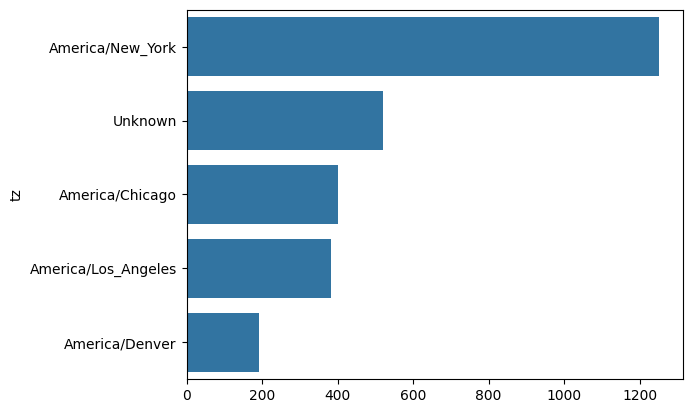

In [35]:
subset = tz_counts.head()
sns.barplot(y=subset.index, x=subset.to_numpy())

In [26]:
frame["a"][1]

'GoogleMaps/RochesterNY'

In [27]:
frame["a"][50]

'Mozilla/5.0 (Windows NT 5.1; rv:10.0.2) Gecko/20100101 Firefox/10.0.2'

In [28]:
frame["a"][51][:50]

'Mozilla/5.0 (Linux; U; Android 2.2.2; en-us; LG-P9'

In [29]:
results = pd.Series([x.split()[0] for x in frame["a"].dropna()])
results.head(5)

,0
0,Mozilla/5.0
1,GoogleMaps/RochesterNY
2,Mozilla/4.0
3,Mozilla/5.0
4,Mozilla/5.0


In [30]:
results.value_counts().head(8)

,count
Mozilla/5.0,2594
Mozilla/4.0,601
GoogleMaps/RochesterNY,121
Opera/9.80,34
TEST_INTERNET_AGENT,24
GoogleProducer,21
Mozilla/6.0,5
BlackBerry8520/5.0.0.681,4


In [31]:
cframe = frame[frame["a"].notna()].copy()

In [36]:
cframe["os"] = np.where(cframe["a"].str.contains("Windows"), "Windows", "Not Windows")
cframe["os"].head(5)

,os
0,Windows
1,Not Windows
2,Windows
3,Not Windows
4,Windows


In [37]:
by_tz_os = cframe.groupby(["tz", "os"])

In [38]:
agg_counts = by_tz_os.size().unstack().fillna(0)
agg_counts.head()

os,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0


In [39]:
indexer = agg_counts.sum("columns").argsort()
indexer.values[:10]

array([ 2,  7,  5,  4, 14, 11,  9,  8, 24, 26])

In [40]:
count_subset = agg_counts.take(indexer[-10:])
count_subset

os,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


In [41]:
agg_counts.sum(axis="columns").nlargest(10)

,0
tz,
America/New_York,1251.0
,521.0
America/Chicago,400.0
America/Los_Angeles,382.0
America/Denver,191.0
Europe/London,74.0
Asia/Tokyo,37.0
Pacific/Honolulu,36.0
Europe/Madrid,35.0


In [42]:
count_subset = count_subset.stack()
count_subset.name = "total"
count_subset = count_subset.reset_index()
count_subset.head(10)

,tz,os,total
0,America/Sao_Paulo,Not Windows,13.0
1,America/Sao_Paulo,Windows,20.0
2,Europe/Madrid,Not Windows,16.0
3,Europe/Madrid,Windows,19.0
4,Pacific/Honolulu,Not Windows,0.0
5,Pacific/Honolulu,Windows,36.0
6,Asia/Tokyo,Not Windows,2.0
7,Asia/Tokyo,Windows,35.0
8,Europe/London,Not Windows,43.0
9,Europe/London,Windows,31.0


<Axes: xlabel='total', ylabel='tz'>

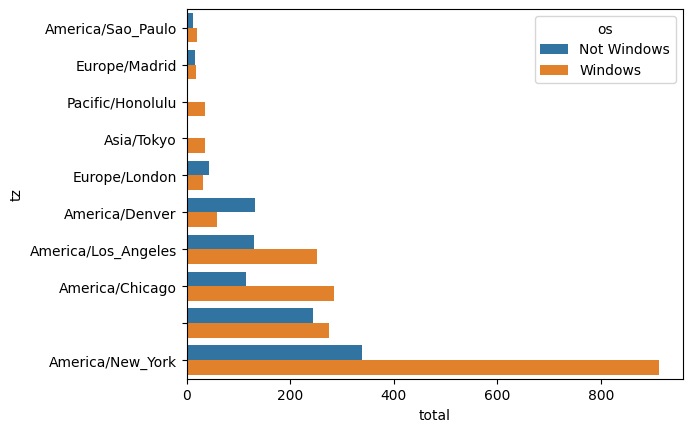

In [43]:
sns.barplot(x="total", y="tz", hue="os", data=count_subset)

In [44]:
def norm_total(group):
  group["normed_total"] = group["total"] / group["total"].sum()
  return group
results = count_subset.groupby("tz").apply(norm_total)

/tmp/ipython-input-1432819997.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  results = count_subset.groupby("tz").apply(norm_total)


<Axes: xlabel='normed_total', ylabel='tz'>

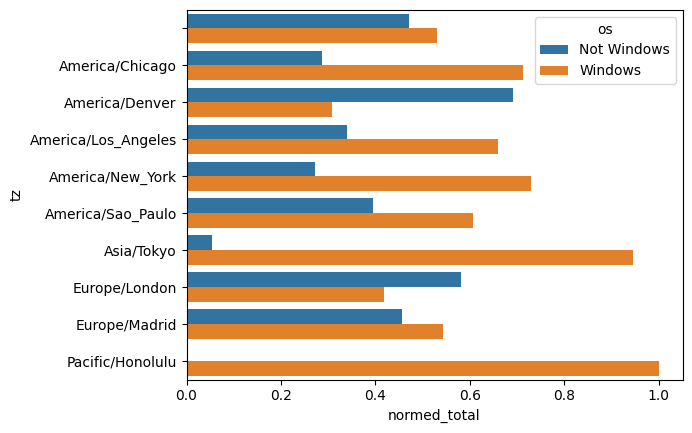

In [45]:
sns.barplot(x="normed_total", y="tz", hue="os", data=results)

In [46]:
g = count_subset.groupby("tz")
results2 = count_subset["total"] / g["total"].transform("sum")

##13.2 MovieLens 1M Dataset

In [62]:
path = "/content/drive/MyDrive/DataAnalysis/Tuần 7/ml-1m/ml-1m"

In [64]:
unames = ["user_id", "gender", "age", "occupation", "zip"]
users = pd.read_table(f"{path}/users.dat", sep="::", header=None, names=unames, engine="python", encoding="latin-1")

rnames = ["user_id", "movie_id", "rating", "timestamp"]
ratings = pd.read_table(f"{path}/ratings.dat", sep="::", header=None, names=rnames, engine="python", encoding="latin-1")

mnames = ["movie_id", "title", "genres"]
movies = pd.read_table(f"{path}/movies.dat", sep="::", header=None, names=mnames, engine="python", encoding="latin-1")


In [65]:
users.head(5)

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [66]:
ratings.head(5)

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [67]:
movies.head(5)

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [68]:
ratings

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [69]:
data = pd.merge(pd.merge(ratings, users), movies)
data

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,1,661,3,978302109,F,1,10,48067,James and the Giant Peach (1996),Animation|Children's|Musical
2,1,914,3,978301968,F,1,10,48067,My Fair Lady (1964),Musical|Romance
3,1,3408,4,978300275,F,1,10,48067,Erin Brockovich (2000),Drama
4,1,2355,5,978824291,F,1,10,48067,"Bug's Life, A (1998)",Animation|Children's|Comedy
...,...,...,...,...,...,...,...,...,...,...
1000204,6040,1091,1,956716541,M,25,6,11106,Weekend at Bernie's (1989),Comedy
1000205,6040,1094,5,956704887,M,25,6,11106,"Crying Game, The (1992)",Drama|Romance|War
1000206,6040,562,5,956704746,M,25,6,11106,Welcome to the Dollhouse (1995),Comedy|Drama
1000207,6040,1096,4,956715648,M,25,6,11106,Sophie's Choice (1982),Drama


In [70]:
data.iloc[0]

,0
user_id,1
movie_id,1193
rating,5
timestamp,978300760
gender,F
age,1
occupation,10
zip,48067
title,One Flew Over the Cuckoo's Nest (1975)
genres,Drama


In [71]:
mean_ratings = data.pivot_table("rating", index="title", columns="gender", aggfunc="mean")

In [72]:
mean_ratings.head(5)

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


In [73]:
ratings_by_title = data.groupby("title").size()
ratings_by_title.head()

,0
title,
"$1,000,000 Duck (1971)",37
'Night Mother (1986),70
'Til There Was You (1997),52
"'burbs, The (1989)",303
...And Justice for All (1979),199


In [74]:
active_titles = ratings_by_title.index[ratings_by_title >= 250]
active_titles

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '2010 (1984)',
       ...
       'X-Men (2000)', 'Year of Living Dangerously (1982)',
       'Yellow Submarine (1968)', 'You've Got Mail (1998)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Sherlock Holmes (1985)',
       'Zero Effect (1998)', 'eXistenZ (1999)'],
      dtype='object', name='title', length=1216)

In [75]:
mean_ratings = mean_ratings.loc[active_titles]
mean_ratings

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421
...,...,...
Young Guns (1988),3.371795,3.425620
Young Guns II (1990),2.934783,2.904025
Young Sherlock Holmes (1985),3.514706,3.363344


In [76]:
top_female_ratings = mean_ratings.sort_values("F", ascending=False)
top_female_ratings.head()

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415


### Measuring Rating Disagreement

In [77]:
mean_ratings["diff"] = mean_ratings["M"] - mean_ratings["F"]

In [78]:
sorted_by_diff = mean_ratings.sort_values("diff")
sorted_by_diff.head()

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777


In [79]:
sorted_by_diff[::-1].head()

gender,F,M,diff
title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787


In [80]:
rating_std_by_title = data.groupby("title")["rating"].std()
rating_std_by_title = rating_std_by_title.loc[active_titles]
rating_std_by_title.head()

,rating
title,
"'burbs, The (1989)",1.107760
10 Things I Hate About You (1999),0.989815
101 Dalmatians (1961),0.982103
101 Dalmatians (1996),1.098717
12 Angry Men (1957),0.812731


In [81]:
rating_std_by_title.sort_values(ascending=False)[:10]

,rating
title,
Dumb & Dumber (1994),1.321333
"Blair Witch Project, The (1999)",1.316368
Natural Born Killers (1994),1.307198
Tank Girl (1995),1.277695
"Rocky Horror Picture Show, The (1975)",1.260177
Eyes Wide Shut (1999),1.259624
Evita (1996),1.253631
Billy Madison (1995),1.249970
Fear and Loathing in Las Vegas (1998),1.246408


In [82]:
movies["genres"].head()

,genres
0,Animation|Children's|Comedy
1,Adventure|Children's|Fantasy
2,Comedy|Romance
3,Comedy|Drama
4,Comedy


In [83]:
movies["genres"].head().str.split("|")

,genres
0,"[Animation, Children's, Comedy]"
1,"[Adventure, Children's, Fantasy]"
2,"[Comedy, Romance]"
3,"[Comedy, Drama]"
4,[Comedy]


In [87]:
movies["genre"] = movies.pop("genre").str.split("|")
movies.head()

,movie_id,title,genre
0,1,Toy Story (1995),NaN
1,2,Jumanji (1995),NaN
2,3,Grumpier Old Men (1995),NaN
3,4,Waiting to Exhale (1995),NaN
4,5,Father of the Bride Part II (1995),NaN


In [88]:
movies_exploded = movies.explode("genre")
movies_exploded[:10]

,movie_id,title,genre
0,1,Toy Story (1995),NaN
1,2,Jumanji (1995),NaN
2,3,Grumpier Old Men (1995),NaN
3,4,Waiting to Exhale (1995),NaN
4,5,Father of the Bride Part II (1995),NaN
5,6,Heat (1995),NaN
6,7,Sabrina (1995),NaN
7,8,Tom and Huck (1995),NaN
8,9,Sudden Death (1995),NaN
9,10,GoldenEye (1995),NaN


In [89]:
ratings_with_genre = pd.merge(pd.merge(movies_exploded, ratings), users)
ratings_with_genre.iloc[0]

,0
movie_id,1
title,Toy Story (1995)
genre,NaN
user_id,1
rating,5
timestamp,978824268
gender,F
age,1
occupation,10
zip,48067


In [92]:
genre_ratings = (ratings_with_genre.groupby(["genre", "age"])["rating"].mean().unstack("age"))
genre_ratings[:10]

/tmp/ipython-input-3994754421.py:2: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  genre_ratings[:10]


age
genre


#Advanced NumPy

In [ ]:
import numpy as np

## A.1 ndarray Object Internals

In [93]:
np.ones((10, 5)).shape

(10, 5)

In [94]:
np.ones((3, 4, 5), dtype=np.float64).strides

(160, 40, 8)

###NumPy Data Type Hierarchy

In [96]:
ints = np.ones(10, dtype=np.uint16)
floats = np.ones(10, dtype=np.float32)
np.issubdtype(ints.dtype, np.integer)

True

In [97]:
np.issubdtype(floats.dtype, np.floating)

True

In [98]:
np.float64.mro()

[numpy.float64,
 numpy.floating,
 numpy.inexact,
 numpy.number,
 numpy.generic,
 float,
 object]

In [99]:
np.issubdtype(ints.dtype, np.number)

True

##A.2 Advanced Array Manipulation

###Reshaping Arrays

In [101]:
arr = np.arange(8)
arr

array([0, 1, 2, 3, 4, 5, 6, 7])

In [102]:
arr.reshape((4, 2))

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7]])

In [103]:
arr.reshape((4, 2)).reshape((2, 4))

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

In [105]:
arr = np.arange(15)
arr.reshape((5, -1))

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14]])

In [106]:
other_arr = np.ones((3, 5))
other_arr.shape

(3, 5)

In [107]:
arr.reshape(other_arr.shape)

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [108]:
arr = np.arange(15).reshape((5, 3))
arr

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14]])

In [109]:
arr.ravel()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [110]:
arr.flatten()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

### C Versus FORTRAN Order

In [112]:
arr = np.arange(12).reshape((3, 4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [113]:
arr.ravel()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [114]:
arr.ravel('F')

array([ 0,  4,  8,  1,  5,  9,  2,  6, 10,  3,  7, 11])

###Concatenating and Splitting Arrays

In [115]:
arr1 = np.array([[1, 2, 3], [4, 5, 6]])
arr2 = np.array([[7, 8, 9], [10, 11, 12]])
np.concatenate([arr1, arr2], axis=0)

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [116]:
np.concatenate([arr1, arr2], axis=1)

array([[ 1,  2,  3,  7,  8,  9],
       [ 4,  5,  6, 10, 11, 12]])

In [117]:
np.vstack((arr1, arr2))

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [118]:
np.hstack((arr1, arr2))

array([[ 1,  2,  3,  7,  8,  9],
       [ 4,  5,  6, 10, 11, 12]])

In [120]:
rng = np.random.default_rng()
arr = rng.standard_normal((5, 2))
arr

array([[ 0.92608223, -0.07848408],
       [-1.43319596,  1.66284727],
       [ 0.31409345,  1.72087261],
       [ 0.42775316, -1.55257695],
       [ 0.24421239,  1.34244747]])

In [121]:
first, second, third = np.split(arr, [1, 3])
first

array([[ 0.92608223, -0.07848408]])

In [122]:
second

array([[-1.43319596,  1.66284727],
       [ 0.31409345,  1.72087261]])

In [123]:
third

array([[ 0.42775316, -1.55257695],
       [ 0.24421239,  1.34244747]])

###Stacking helpers: r_ and c_

In [125]:
arr = np.arange(6)
arr1 = arr.reshape((3, 2))
arr2 = rng.standard_normal((3, 2))
np.r_[arr1, arr2]

array([[ 0.        ,  1.        ],
       [ 2.        ,  3.        ],
       [ 4.        ,  5.        ],
       [-0.02488209,  0.76829735],
       [ 0.69286874,  0.93804025],
       [ 0.82374518, -0.65448488]])

In [126]:
np.c_[np.r_[arr1, arr2], arr]

array([[ 0.        ,  1.        ,  0.        ],
       [ 2.        ,  3.        ,  1.        ],
       [ 4.        ,  5.        ,  2.        ],
       [-0.02488209,  0.76829735,  3.        ],
       [ 0.69286874,  0.93804025,  4.        ],
       [ 0.82374518, -0.65448488,  5.        ]])

In [127]:
np.c_[1:6, -10:-5]

array([[  1, -10],
       [  2,  -9],
       [  3,  -8],
       [  4,  -7],
       [  5,  -6]])

###Repeating Elements: tile and repeat

In [128]:
arr = np.arange(3)
arr

array([0, 1, 2])

In [129]:
arr.repeat(3)

array([0, 0, 0, 1, 1, 1, 2, 2, 2])

In [130]:
arr.repeat([2, 3, 4])

array([0, 0, 1, 1, 1, 2, 2, 2, 2])

In [132]:
arr = rng.standard_normal((2, 2))
arr

array([[ 1.12576134, -1.88494573],
       [-0.58952134, -0.50847927]])

In [133]:
arr.repeat(2, axis=0)

array([[ 1.12576134, -1.88494573],
       [ 1.12576134, -1.88494573],
       [-0.58952134, -0.50847927],
       [-0.58952134, -0.50847927]])

In [134]:
arr.repeat([2, 3], axis=0)

array([[ 1.12576134, -1.88494573],
       [ 1.12576134, -1.88494573],
       [-0.58952134, -0.50847927],
       [-0.58952134, -0.50847927],
       [-0.58952134, -0.50847927]])

In [135]:
arr.repeat([2, 3], axis=1)

array([[ 1.12576134,  1.12576134, -1.88494573, -1.88494573, -1.88494573],
       [-0.58952134, -0.58952134, -0.50847927, -0.50847927, -0.50847927]])

In [136]:
arr

array([[ 1.12576134, -1.88494573],
       [-0.58952134, -0.50847927]])

In [137]:
np.tile(arr, 2)

array([[ 1.12576134, -1.88494573,  1.12576134, -1.88494573],
       [-0.58952134, -0.50847927, -0.58952134, -0.50847927]])

In [138]:
arr

array([[ 1.12576134, -1.88494573],
       [-0.58952134, -0.50847927]])

In [139]:
np.tile(arr, (2, 1))

array([[ 1.12576134, -1.88494573],
       [-0.58952134, -0.50847927],
       [ 1.12576134, -1.88494573],
       [-0.58952134, -0.50847927]])

In [140]:
np.tile(arr, (3, 2))

array([[ 1.12576134, -1.88494573,  1.12576134, -1.88494573],
       [-0.58952134, -0.50847927, -0.58952134, -0.50847927],
       [ 1.12576134, -1.88494573,  1.12576134, -1.88494573],
       [-0.58952134, -0.50847927, -0.58952134, -0.50847927],
       [ 1.12576134, -1.88494573,  1.12576134, -1.88494573],
       [-0.58952134, -0.50847927, -0.58952134, -0.50847927]])

###Fancy Indexing Equivalents: take and put

In [142]:
arr = np.arange(10) * 100
inds = [7, 1, 2, 6]
arr[inds]

array([700, 100, 200, 600])

In [143]:
arr.take(inds)

array([700, 100, 200, 600])

In [144]:
arr.put(inds, 42)
arr

array([  0,  42,  42, 300, 400, 500,  42,  42, 800, 900])

In [145]:
arr.put(inds, [40, 41, 42, 43])
arr

array([  0,  41,  42, 300, 400, 500,  43,  40, 800, 900])

In [146]:
inds = [2, 0, 2, 1]
arr = rng.standard_normal((2, 4))
arr

array([[-0.03411198, -1.20957321,  0.73671926, -1.66955706],
       [-0.63964658, -0.09367167, -1.86746893, -0.19397506]])

In [147]:
arr.take(inds, axis=1)

array([[ 0.73671926, -0.03411198,  0.73671926, -1.20957321],
       [-1.86746893, -0.63964658, -1.86746893, -0.09367167]])